# Chirped Z-transform (CZT)

CZT allows, in a single step, to propagate to a near or far observation plane. IThe main advantage of CZT is that the region of interest and the sampling numbers can be arbitrarily chosen, endowing CZT with superior flexibility, and produces much faster results (acceleration > x100 with respect to RS algorithm) for focusing and far field diffraction patterns.

As the sampling area and pixels can be reduced to the desired observation area, the storage is also greatly reduced.

CZT algorithm allows to have a XY mask and compute in XY, Z, XZ, XYZ schemes, simply defining the output arrays.


## X Scheme

In [1]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z


In [2]:
size = 250 * um
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
z = 2 * mm


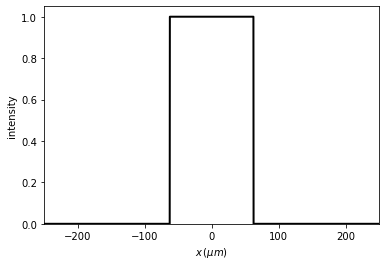

In [3]:
t0 = Scalar_mask_X(xin, wavelength)
t0.slit(x0=0, size=size / 2)
u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw()


### to just one data

In [4]:
xout = 0.
z = 2 * mm


In [5]:
%%time
u2 = u1.CZT(z, xout)
print(u2)


[0.63252658+0.60319534j]
CPU times: user 6.8 ms, sys: 0 ns, total: 6.8 ms
Wall time: 5.72 ms


### to field_Z

In [6]:
xout = 0
z = np.linspace(.5 * mm, 10 * mm, 1024)


In [7]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 3.81 s, sys: 54 ms, total: 3.86 s
Wall time: 3.81 s


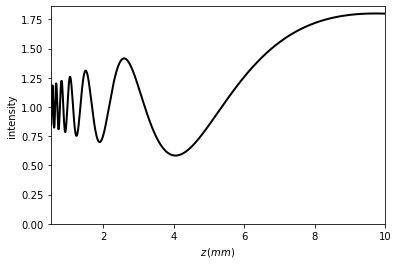

In [8]:
u2.draw(z_scale='mm')


### to field_X

In [9]:
xout = np.linspace(-size, size, 256)
z = 2 * mm


In [10]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 9.8 ms, sys: 215 µs, total: 10 ms
Wall time: 9.34 ms


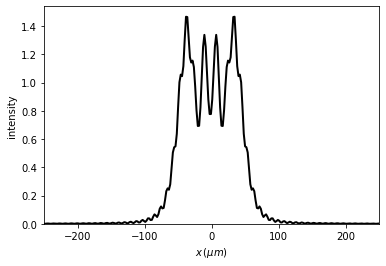

In [11]:
u2.draw()


### to field_XZ

In [12]:
xout = np.linspace(-size / 2, size / 2, 2048)
z = np.linspace(1 * mm, 15 * mm, 128)


In [13]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 1.13 s, sys: 23.2 ms, total: 1.15 s
Wall time: 1.15 s


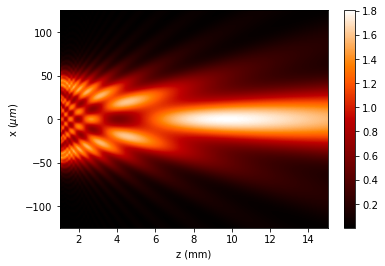

In [14]:
u2.draw(logarithm=0, z_scale='mm')
plt.colorbar()


### to data

In [18]:
xout = 0
yout = 0.
z = .5 * mm


In [19]:
%%time
u2 = u1.CZT(z, xout, yout)
print("{}".format(np.abs(u2)**2))


0.005578354037388983
CPU times: user 65 ms, sys: 23.6 ms, total: 88.6 ms
Wall time: 88.7 ms


### to field_X

In [20]:
xout = np.linspace(-size, size, 512)
yout = 0.
z = .5 * mm


CPU times: user 120 ms, sys: 7.92 ms, total: 127 ms
Wall time: 126 ms


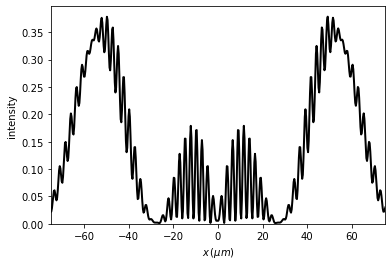

In [21]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_XY


In [22]:
xout = np.linspace(-size, size, 256)
yout = np.linspace(-size, size, 256)
z = .25 * mm


CPU times: user 342 ms, sys: 124 ms, total: 465 ms
Wall time: 256 ms


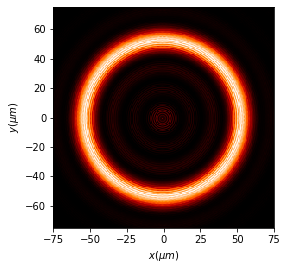

In [23]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_Z

The Z field is computed with a for loop, thus it is a bit slower.

In [24]:
xout = -1.
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 64)


num x, num y, num z = 1, 1, 64
CPU times: user 3.75 s, sys: 37.4 ms, total: 3.78 s
Wall time: 3.75 s


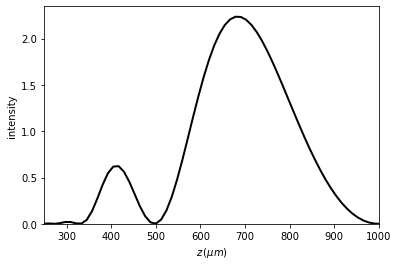

In [25]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw()


### to field_XZ

In [26]:
xout = np.linspace(-size, size, 128)
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 128)


num x, num y, num z = 128, 1, 128
CPU times: user 7.31 s, sys: 1.9 s, total: 9.22 s
Wall time: 9.22 s


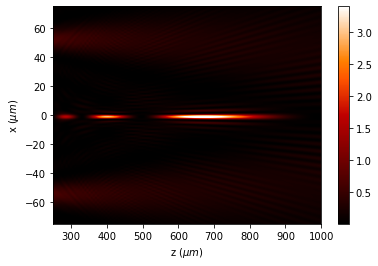

In [27]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw()
plt.colorbar()


### to field_XYZ

In [28]:
xout = np.linspace(-size, size, 128)
yout = np.linspace(-size, size, 128)
z = np.linspace(0.25 * mm, 6 * mm, 64)


In [29]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)


num x, num y, num z = 128, 128, 64
CPU times: user 3.86 s, sys: 815 ms, total: 4.68 s
Wall time: 4.68 s


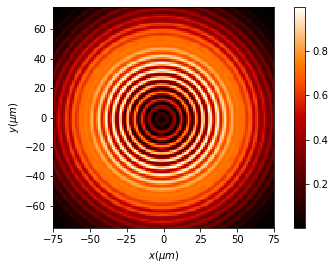

In [30]:
u2.draw_XY(z0=1 * mm)
plt.colorbar()


## CZT for reducing the output size

Chirped z-Transform algorithm is specially indicated for cases where the output field is much smaller than the input field, as you can choose the position and sampling of the field. An important example for this is the focusing of a lens.

### X scheme

In [32]:
size = 3 * mm
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
focal = 250 * mm


In [33]:
%load_ext autoreload
%autoreload 2

In [34]:
t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0


In [35]:
xout = 0.
z = np.linspace(focal - 30 * mm, focal + 30 * mm, 128)


CPU times: user 591 ms, sys: 4.43 ms, total: 595 ms
Wall time: 596 ms


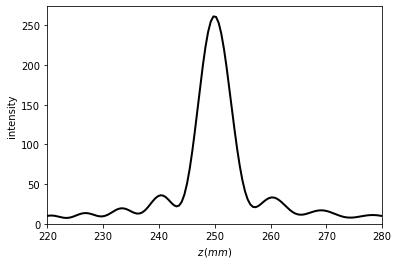

In [36]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(z_scale='mm')


In [37]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = focal


CPU times: user 28.9 ms, sys: 168 µs, total: 29.1 ms
Wall time: 28.4 ms


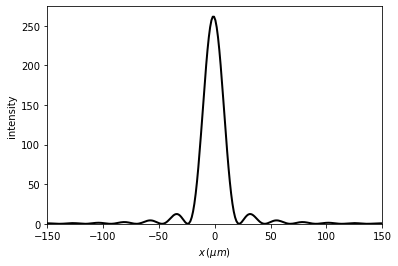

In [38]:
%%time
u2 = u1.CZT(focal, xout)
u2.draw()


In [39]:
xout = np.linspace(-150 * um, 150 * um, 128)
z = np.linspace(focal - 20 * mm, focal + 20 * mm, 128)


CPU times: user 1.17 s, sys: 2.44 ms, total: 1.17 s
Wall time: 1.16 s


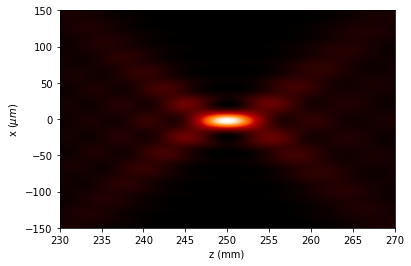

In [40]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(logarithm=0, z_scale='mm')


### XY scheme

In [41]:
size = 2 * mm
xin = np.linspace(-size, size, 512)
yin = np.linspace(-size, size, 512)
wavelength = 550 * nm
focal = 500 * mm


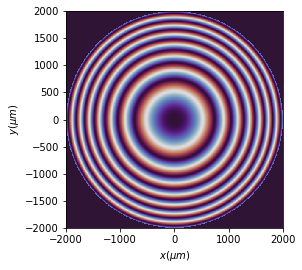

In [42]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.lens(r0=(0, 0), focal=focal, radius=0)
t0.pupil()

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0


In [43]:
xout = np.linspace(-150 * um, 150 * um, 128)
yout = np.linspace(-150 * um, 150 * um, 128)
z = focal


num x, num y, num z = 128, 128, 1
CPU times: user 408 ms, sys: 279 ms, total: 688 ms
Wall time: 336 ms


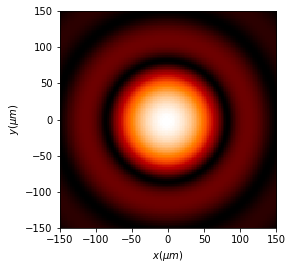

In [44]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw(logarithm=1e-1)
